<a href="https://colab.research.google.com/github/LuisAMGo/M5-Forecasting-Try/blob/main/Entregable_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mejora de RED

In [2]:
lista_porc_part = pd.DataFrame([['MANRIQUE GOMEZ, Luis Antonio', 100, 'Todo entregable 03']], columns=['Nombres', 'Participación','Descripción'])
lista_porc_part

,Nombres,Participación,Descripción
0,"MANRIQUE GOMEZ, Luis Antonio",100,Todo entregable 03


## Datos 

In [1]:
# Manejo de archivos
import pandas as pd
# Calculos numericos/matemáticos
import numpy as np
# Modulo de datos 
import datetime

In [3]:
# Conectar al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Levantamos la data con pandas
calendar_df = pd.read_csv('/content/drive/MyDrive/IRN/Datasets/calendar.csv', parse_dates=['date'])
sales_evaluation_df = pd.read_csv('/content/drive/MyDrive/IRN/Datasets/sales_train_evaluation.csv')
sales_validation_df = pd.read_csv('/content/drive/MyDrive/IRN/Datasets/sales_train_validation.csv')
sell_prices_df = pd.read_csv('/content/drive/MyDrive/IRN/Datasets/sell_prices.csv')

In [5]:
# Cambia el tipo de dato en su misma categoría a uno que implique menos procesamiento.
def df_memory_reduce(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Uso de memoria se ha reducido a {:5.2f} Mb que representa un reduccion del ({:.1f}% del Data Frame original)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
# Invocamos la funcion y guardamos en una variable para luego exportarla en un archivo CSV
sales_validation_df = df_memory_reduce(sales_validation_df)

Uso de memoria se ha reducido a 95.00 Mb que representa un reduccion del (78.7% del Data Frame original)


In [7]:
# Exportacion del DataFrame transformado a un archivo CSV
sales_validation_df.to_csv('/content/drive/MyDrive/IRN/Datasets/sales_train_validation_weight_reduced.csv')
# Lectura del archivo  CSV transformado
sales_validation_df = pd.read_csv('/content/drive/MyDrive/IRN/Datasets/sales_train_validation_weight_reduced.csv', index_col=0)

In [8]:
# Preprocesamiento
from sklearn.preprocessing import LabelEncoder

def transformer(dataframe):
    nan_feat = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    for feature in nan_feat:
        dataframe[feature].fillna('desconocido', inplace = True)
        
    categorias = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    for feature in categorias:
        le = LabelEncoder()
        dataframe[feature] = le.fit_transform(dataframe[feature])
    
    return dataframe

## Pruebas con los datos 

In [ ]:
calendar_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
sales_evaluation_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [9]:
Dias = [col for col in sales_validation_df if col.startswith('d_')] ## LISTA DE LOS DIAS
Dias2 =[col for col in sales_evaluation_df if col.startswith('d_')]

In [10]:
base = datetime.datetime(2011,1,29)
sales_sum = pd.DataFrame(sales_validation_df[Dias].sum(axis =0),columns = ["sales"])
sales_sum['Tiempo'] = [base + datetime.timedelta(days=x) for x in range(1913)]
sales_sum.set_index('Tiempo', drop=True, inplace=True)
sales_sum.sort_index(inplace=True)

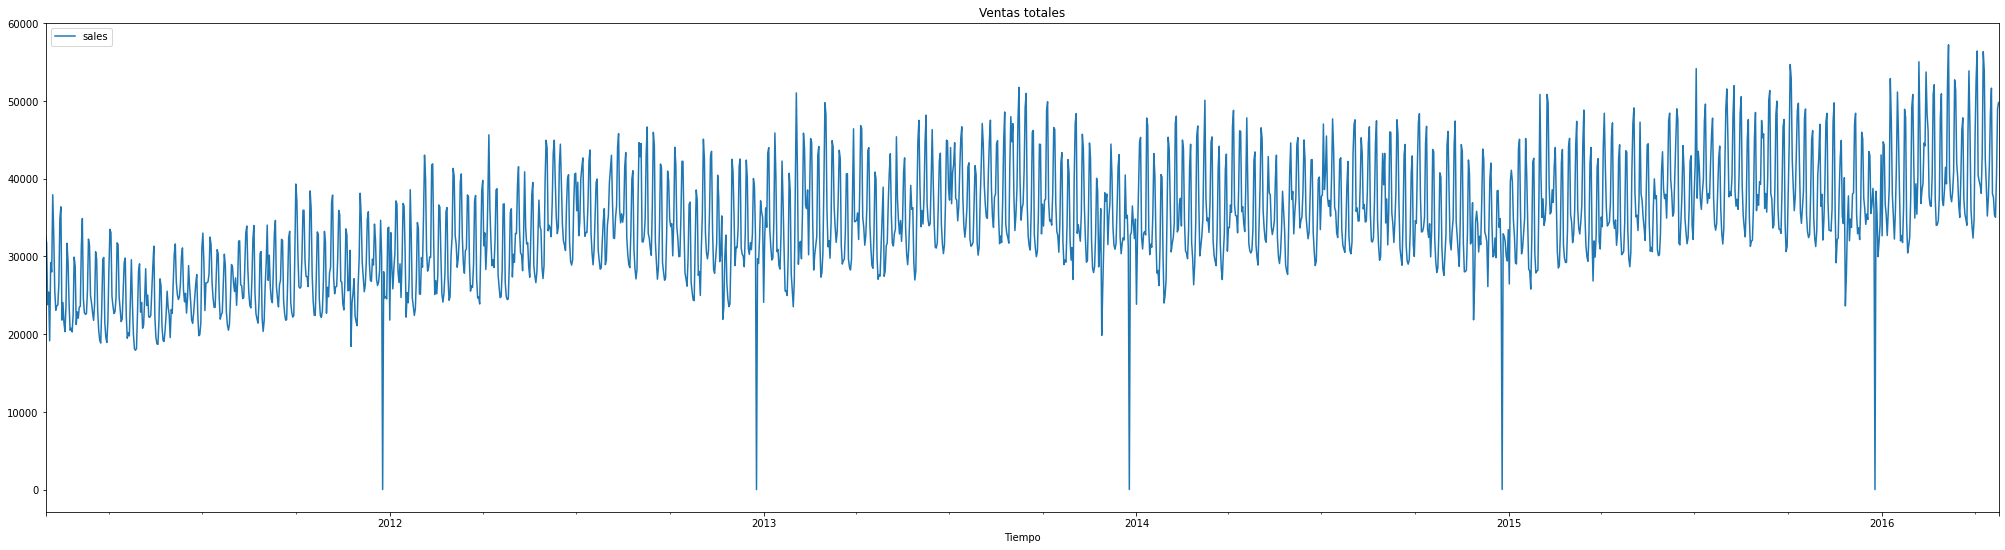

In [ ]:
sales_sum.plot(title = "Ventas totales",figsize=(35,9))

In [11]:
# Ventas totales agrupadas por semana 
Sales_week = sales_sum.groupby(pd.Grouper(freq='7D')).sum()
Sales_week.head()

,sales
Tiempo,
2011-01-29,189942
2011-02-05,193170
2011-02-12,182569
2011-02-19,169002
2011-02-26,171820


## Formacion de grupos de datos 

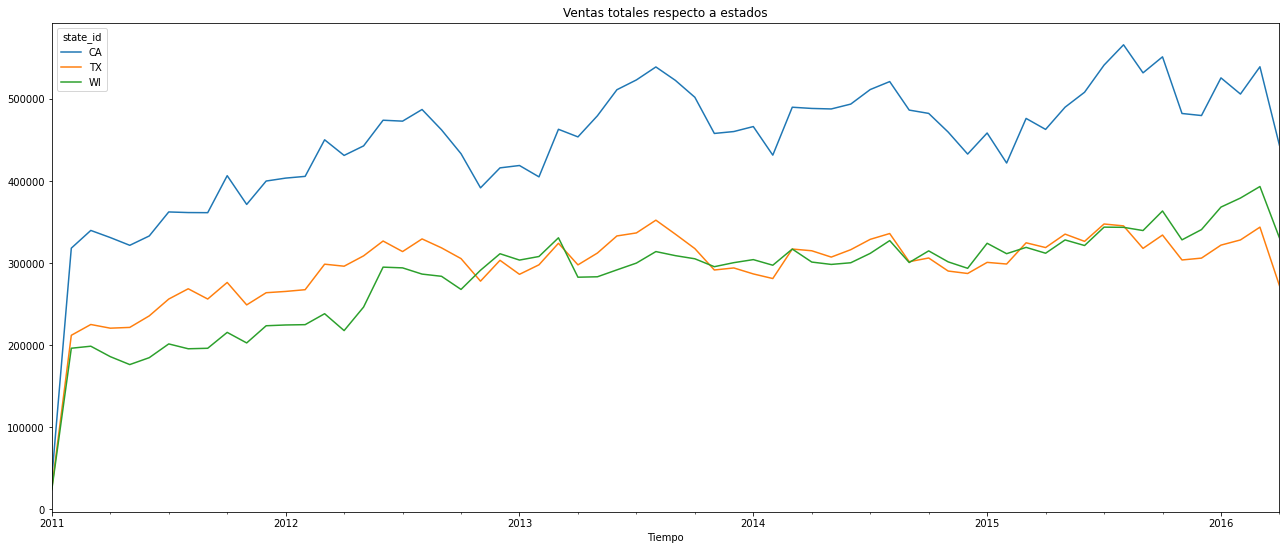

In [12]:
state_level = sales_validation_df.groupby("state_id")[Dias].sum().reset_index().set_index('state_id').T
state_level['Tiempo'] = [base + datetime.timedelta(days=x) for x in range(1913)]
state_level.set_index('Tiempo', drop=True, inplace=True)
state_level.sort_index(inplace=True)
state_level.head()
state_month_level = state_level.groupby(pd.Grouper(freq='1M')).sum()
state_month_level.plot(title = "Ventas totales respecto a estados", figsize=(22,9))

In [13]:
store_level = sales_validation_df.groupby("store_id")[Dias].sum().reset_index().set_index('store_id').T
store_level['Tiempo'] = [base + datetime.timedelta(days=x) for x in range(1913)]
store_level.set_index('Tiempo', drop=True, inplace=True)
store_level.sort_index(inplace=True)
store_level.head()

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
Tiempo,,,,,,,,,,
2011-01-29,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
2011-01-30,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
2011-01-31,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
2011-02-01,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
2011-02-02,2630,1942,3817,1536,1694,2492,1726,2,1175,2132


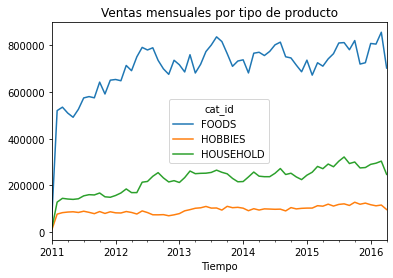

In [14]:
type_level = sales_validation_df.groupby("cat_id")[Dias].sum().reset_index().set_index('cat_id').T
type_level['Tiempo'] = [base + datetime.timedelta(days=x) for x in range(1913)]
type_level.set_index('Tiempo', drop=True, inplace=True)
type_level.sort_index(inplace=True)
type_level.head()
type_month_level = type_level.groupby(pd.Grouper(freq='1M')).sum()
type_month_level.plot(title = "Ventas mensuales por tipo de producto")

In [15]:
state_type_level = sales_validation_df.groupby(["state_id","cat_id"])[Dias].sum().reset_index().set_index(["state_id","cat_id"]).T
state_type_level['Tiempo'] = [base + datetime.timedelta(days=x) for x in range(1913)]
state_type_level.set_index('Tiempo', drop=True, inplace=True)
state_type_level.sort_index(inplace=True)
state_type_month_level = state_type_level.groupby(pd.Grouper(freq='1M')).sum()
state_type_month_level.head()

state_id        CA                        TX                        WI  \
cat_id       FOODS HOBBIES HOUSEHOLD   FOODS HOBBIES HOUSEHOLD   FOODS   
Tiempo                                                                   
2011-01-31   26907    4835      6366   19007    2275      4564   17196   
2011-02-28  223073   39825     55203  155149   17833     39033  142028   
2011-03-31  232372   43502     63804  164761   18499     41902  137781   
2011-04-30  223176   43569     64259  159147   19947     41587  127245   
2011-05-31  213705   43878     63983  159197   21397     41026  118851   

state_id                      
cat_id     HOBBIES HOUSEHOLD  
Tiempo                        
2011-01-31    2693      4320  
2011-02-28   19704     34527  
2011-03-31   21690     39256  
2011-04-30   22683     36100  
2011-05-31   22138     35387

Separaremos las ventas totales por cada uno de los item_idm, en total 3094

In [16]:
item_id_level = sales_validation_df.groupby("item_id")[Dias].sum().reset_index().set_index('item_id').T
item_id_level['Tiempo'] = [base + datetime.timedelta(days=x) for x in range(1913)]
item_id_level.set_index('Tiempo', drop=True, inplace=True)
item_id_level.sort_index(inplace=True)

## RED NEURONAL 

In [ ]:
len(item_id_level)

1913

In [17]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [18]:
item_id_level = downcast_dtypes(item_id_level)
Data = item_id_level

In [ ]:
Data.head()

item_id,FOODS_1_001,FOODS_1_002,FOODS_1_003,FOODS_1_004,FOODS_1_005,FOODS_1_006,FOODS_1_008,FOODS_1_009,FOODS_1_010,FOODS_1_011,...,HOUSEHOLD_2_507,HOUSEHOLD_2_508,HOUSEHOLD_2_509,HOUSEHOLD_2_510,HOUSEHOLD_2_511,HOUSEHOLD_2_512,HOUSEHOLD_2_513,HOUSEHOLD_2_514,HOUSEHOLD_2_515,HOUSEHOLD_2_516
Tiempo,,,,,,,,,,,,,,,,,,,,,
2011-01-29,6,4,14,0,34,16,0,0,0,7,...,0,0,8,0,20,5,0,4,0,2
2011-01-30,6,5,8,0,32,9,0,0,0,1,...,0,0,10,0,24,4,0,8,0,4
2011-01-31,4,7,3,0,13,20,0,0,0,5,...,0,0,12,0,7,1,0,2,0,0
2011-02-01,6,4,6,0,20,16,0,0,0,1,...,0,0,8,0,7,3,0,1,0,3
2011-02-02,7,3,3,0,10,14,0,0,0,0,...,0,0,9,0,9,2,0,1,0,1


## Creacion de modelo 

In [ ]:
len(Data)

1913

In [19]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

In [20]:
scaler = MinMaxScaler()
scaler = scaler.fit(Data)
Data_scaler = scaler.transform(Data)

In [21]:
features = Data_scaler
target = Data_scaler[0:,]

In [22]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.19354839, 0.21052632, 0.42424242, ..., 0.4       ,
          0.        , 0.18181818],
         [0.19354839, 0.26315789, 0.24242424, ..., 0.8       ,
          0.        , 0.36363636]]]),
 array([[0.12903226, 0.36842105, 0.09090909, ..., 0.2       , 0.        ,
         0.        ]]))

In [23]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle = False)

In [24]:
win_lenght = 120
batch_size = 32
num_features = 3049
train_generator = TimeseriesGenerator(x_train, y_train, length=win_lenght, sampling_rate=1, batch_size= batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_lenght, sampling_rate=1, batch_size= batch_size)

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_lenght, num_features), return_sequences= True))
model.add(tf.keras.layers.LSTM(128,activation='sigmoid', return_sequences= True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,activation='sigmoid', return_sequences= False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 128)          1627136   
                                                                 
 lstm_1 (LSTM)               (None, 120, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 120, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,808,193
Trainable params: 1,808,193
Non-

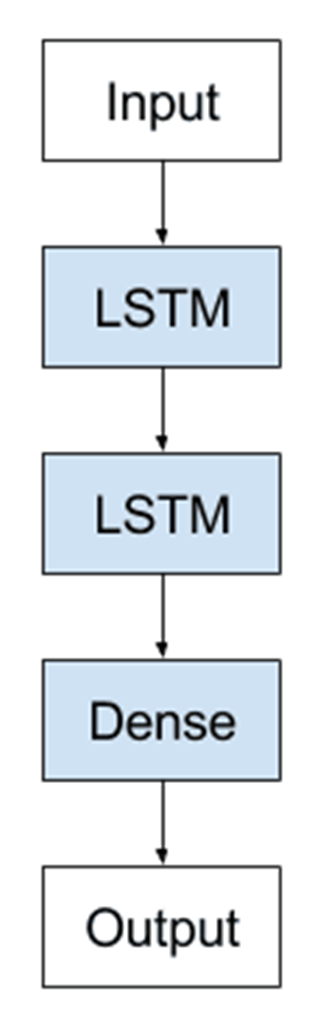

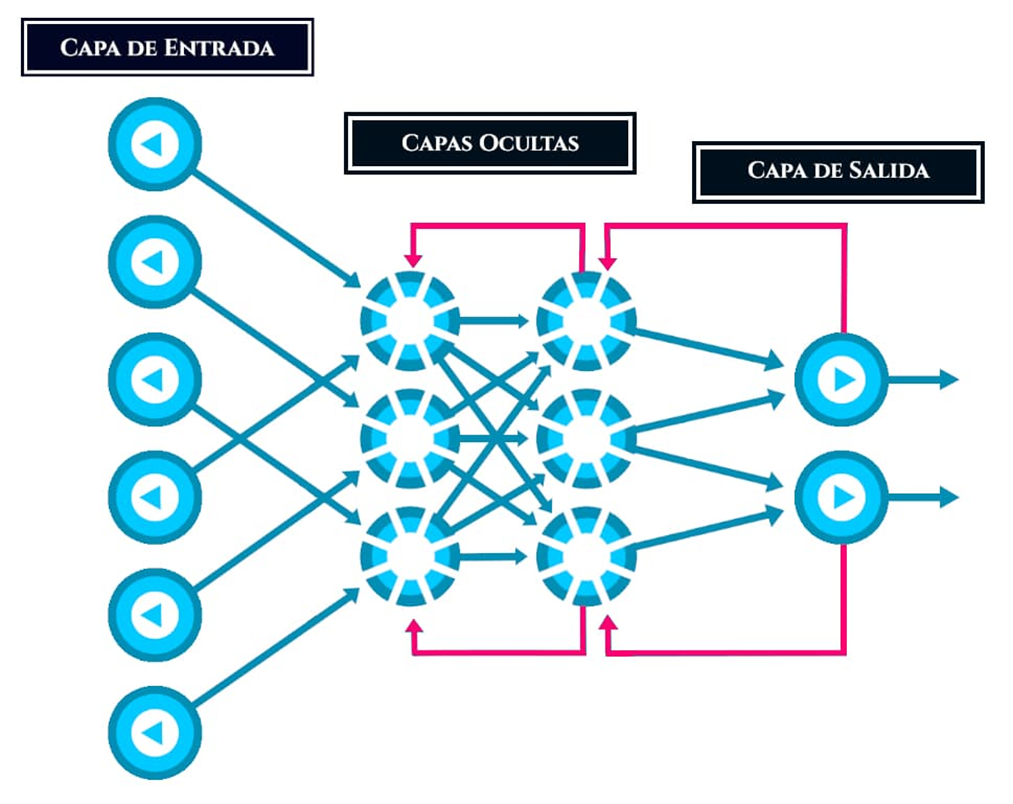

In [26]:
Early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2, mode='min')
model.compile(loss='mse', optimizer='adam', metrics='MeanAbsoluteError')

In [27]:
history = model.fit_generator(train_generator, epochs= 10, validation_data=test_generator, shuffle=False, callbacks=[Early_stopping])


<ipython-input-27-e69823ed4fbc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs= 10, validation_data=test_generator, shuffle=False, callbacks=[Early_stopping])


Epoch 1/10
45/45 [==============================] - 57s 1s/step - loss: 0.0867 - mean_absolute_error: 0.2315 - val_loss: 0.0315 - val_mean_absolute_error: 0.1414
Epoch 2/10
45/45 [==============================] - 50s 1s/step - loss: 0.0468 - mean_absolute_error: 0.1714 - val_loss: 0.0326 - val_mean_absolute_error: 0.1406
Epoch 3/10
45/45 [==============================] - 52s 1s/step - loss: 0.0387 - mean_absolute_error: 0.1569 - val_loss: 0.0323 - val_mean_absolute_error: 0.1404


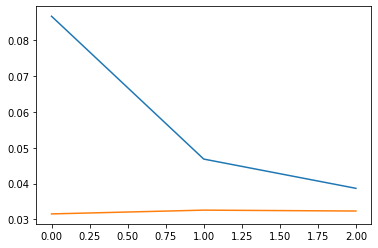

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [29]:
model.evaluate_generator(test_generator, verbose= 0)

<ipython-input-29-526f530f0ee7>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose= 0)


[0.032327283173799515, 0.14043407142162323]

In [30]:
forecast = model.predict_generator(test_generator)

<ipython-input-30-f1a2989c4892>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  forecast = model.predict_generator(test_generator)


In [31]:
forecast.shape

(263, 1)

In [32]:
y_test

array([[0.67741935, 0.47368421, 0.09090909, ..., 0.1       , 0.71428571,
        0.27272727],
       [0.16129032, 0.21052632, 0.06060606, ..., 0.3       , 0.42857143,
        0.09090909],
       [0.12903226, 0.36842105, 0.09090909, ..., 0.1       , 0.57142857,
        0.27272727],
       ...,
       [0.06451613, 0.15789474, 0.09090909, ..., 0.2       , 0.14285714,
        0.09090909],
       [0.51612903, 0.15789474, 0.33333333, ..., 0.2       , 0.71428571,
        0.        ],
       [0.19354839, 0.05263158, 0.15151515, ..., 0.2       , 0.14285714,
        0.09090909]])

In [33]:
x_test

array([[0.67741935, 0.47368421, 0.09090909, ..., 0.1       , 0.71428571,
        0.27272727],
       [0.16129032, 0.21052632, 0.06060606, ..., 0.3       , 0.42857143,
        0.09090909],
       [0.12903226, 0.36842105, 0.09090909, ..., 0.1       , 0.57142857,
        0.27272727],
       ...,
       [0.06451613, 0.15789474, 0.09090909, ..., 0.2       , 0.14285714,
        0.09090909],
       [0.51612903, 0.15789474, 0.33333333, ..., 0.2       , 0.71428571,
        0.        ],
       [0.19354839, 0.05263158, 0.15151515, ..., 0.2       , 0.14285714,
        0.09090909]])

In [34]:
df_forecast = pd.concat([pd.DataFrame(forecast), pd.DataFrame(x_test[:,1:][win_lenght:])],axis=1)

In [35]:
rev_trans=scaler.inverse_transform(df_forecast)

In [36]:
Df_final = pd.DataFrame(rev_trans)
Df_final = Df_final.head(29)

In [37]:
Df_final

,0,1,2,3,4,5,6,7,8,9,...,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048
0,6.456638,5.0,3.0,91.0,9.0,12.0,1.0,0.0,8.0,7.0,...,3.0,2.0,7.0,10.0,4.0,4.0,8.0,0.0,0.0,1.0
1,6.455075,5.0,8.0,84.0,5.0,4.0,11.0,0.0,1.0,12.0,...,6.0,3.0,6.0,7.0,6.0,4.0,9.0,1.0,2.0,2.0
2,6.456300,6.0,9.0,105.0,9.0,6.0,4.0,0.0,1.0,10.0,...,10.0,0.0,12.0,12.0,6.0,7.0,5.0,3.0,2.0,2.0
3,6.456655,5.0,8.0,82.0,7.0,12.0,2.0,1.0,8.0,10.0,...,8.0,3.0,8.0,9.0,6.0,9.0,11.0,1.0,0.0,2.0
4,6.456613,1.0,1.0,94.0,6.0,13.0,2.0,0.0,8.0,8.0,...,5.0,2.0,6.0,15.0,5.0,10.0,3.0,1.0,2.0,1.0
5,6.456758,5.0,4.0,79.0,9.0,11.0,5.0,0.0,4.0,5.0,...,3.0,3.0,3.0,10.0,3.0,3.0,4.0,1.0,1.0,1.0
6,6.456342,7.0,1.0,84.0,16.0,14.0,1.0,0.0,6.0,5.0,...,8.0,1.0,5.0,10.0,2.0,8.0,6.0,4.0,0.0,1.0
7,6.455366,8.0,4.0,70.0,10.0,17.0,3.0,0.0,6.0,3.0,...,5.0,0.0,8.0,13.0,5.0,12.0,5.0,1.0,2.0,0.0
8,6.456868,3.0,4.0,74.0,16.0,19.0,4.0,0.0,3.0,10.0,...,5.0,1.0,2.0,16.0,6.0,7.0,5.0,1.0,1.0,3.0
9,6.456089,3.0,4.0,103.0,9.0,13.0,3.0,0.0,5.0,9.0,...,10.0,2.0,8.0,21.0,4.0,4.0,9.0,2.0,1.0,0.0


Separamos la data real de los proximos 28 dias.

In [38]:
item_id_level_2 = sales_evaluation_df.groupby("item_id")[Dias2].sum().reset_index().set_index('item_id').T
item_id_level_2['Tiempo'] = [base + datetime.timedelta(days=x) for x in range(1941)]
item_id_level_2.set_index('Tiempo', drop=True, inplace=True)
item_id_level_2.sort_index(inplace=True)

In [39]:
Data_real = item_id_level_2.tail(28)

In [40]:
Data_real

item_id,FOODS_1_001,FOODS_1_002,FOODS_1_003,FOODS_1_004,FOODS_1_005,FOODS_1_006,FOODS_1_008,FOODS_1_009,FOODS_1_010,FOODS_1_011,...,HOUSEHOLD_2_507,HOUSEHOLD_2_508,HOUSEHOLD_2_509,HOUSEHOLD_2_510,HOUSEHOLD_2_511,HOUSEHOLD_2_512,HOUSEHOLD_2_513,HOUSEHOLD_2_514,HOUSEHOLD_2_515,HOUSEHOLD_2_516
Tiempo,,,,,,,,,,,,,,,,,,,,,
2016-04-25,4,9,7,0,14,12,1,1,1,5,...,9,1,2,7,9,6,2,0,1,1
2016-04-26,5,4,13,15,9,15,7,11,5,12,...,4,3,2,10,7,3,4,2,1,5
2016-04-27,7,3,9,33,27,10,1,10,8,7,...,9,0,3,10,8,5,0,0,3,0
2016-04-28,1,4,1,67,14,13,1,3,9,9,...,8,4,3,13,5,5,4,0,0,1
2016-04-29,9,5,2,118,14,8,10,13,5,10,...,5,1,6,6,3,12,2,2,1,3
2016-04-30,3,7,4,101,33,12,2,13,4,14,...,5,3,2,15,11,3,5,2,0,0
2016-05-01,9,2,7,132,19,6,1,16,4,8,...,12,4,10,14,14,8,3,4,0,1
2016-05-02,1,5,9,119,17,7,1,6,5,5,...,4,3,5,11,4,9,2,1,0,1
2016-05-03,10,6,2,156,11,26,2,13,5,16,...,4,6,7,9,6,5,5,3,0,0


In [41]:
base1 = datetime.datetime(2016,4,25)
Df_final['Tiempo'] = [base1 + datetime.timedelta(days=x) for x in range(29)]
Df_final.set_index('Tiempo', drop=True, inplace=True)
Df_final.sort_index(inplace=True)
Df_final

,0,1,2,3,4,5,6,7,8,9,...,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048
Tiempo,,,,,,,,,,,,,,,,,,,,,
2016-04-25,6.456638,5.0,3.0,91.0,9.0,12.0,1.0,0.0,8.0,7.0,...,3.0,2.0,7.0,10.0,4.0,4.0,8.0,0.0,0.0,1.0
2016-04-26,6.455075,5.0,8.0,84.0,5.0,4.0,11.0,0.0,1.0,12.0,...,6.0,3.0,6.0,7.0,6.0,4.0,9.0,1.0,2.0,2.0
2016-04-27,6.456300,6.0,9.0,105.0,9.0,6.0,4.0,0.0,1.0,10.0,...,10.0,0.0,12.0,12.0,6.0,7.0,5.0,3.0,2.0,2.0
2016-04-28,6.456655,5.0,8.0,82.0,7.0,12.0,2.0,1.0,8.0,10.0,...,8.0,3.0,8.0,9.0,6.0,9.0,11.0,1.0,0.0,2.0
2016-04-29,6.456613,1.0,1.0,94.0,6.0,13.0,2.0,0.0,8.0,8.0,...,5.0,2.0,6.0,15.0,5.0,10.0,3.0,1.0,2.0,1.0
2016-04-30,6.456758,5.0,4.0,79.0,9.0,11.0,5.0,0.0,4.0,5.0,...,3.0,3.0,3.0,10.0,3.0,3.0,4.0,1.0,1.0,1.0
2016-05-01,6.456342,7.0,1.0,84.0,16.0,14.0,1.0,0.0,6.0,5.0,...,8.0,1.0,5.0,10.0,2.0,8.0,6.0,4.0,0.0,1.0
2016-05-02,6.455366,8.0,4.0,70.0,10.0,17.0,3.0,0.0,6.0,3.0,...,5.0,0.0,8.0,13.0,5.0,12.0,5.0,1.0,2.0,0.0
2016-05-03,6.456868,3.0,4.0,74.0,16.0,19.0,4.0,0.0,3.0,10.0,...,5.0,1.0,2.0,16.0,6.0,7.0,5.0,1.0,1.0,3.0


Comprobamos los resultados por cada item_id

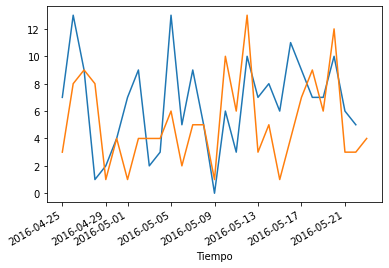

In [42]:
plt.plot(Data_real['FOODS_1_003'])
Df_final[2].plot()